---
title: "Two-Sample and ANOVA Tests"
format:
  html:
    code-fold: true
jupyter: python3
author: "kakamana"
date: "2023-01-18"
categories: [python, datacamp, statistics, machine learning, hypothesis ]
image: "twoSampleAnovaTest.jpg"

---

# Two-Sample and ANOVA Tests

We will learn how to test for differences in means between two groups using t-tests and extend this to more than two groups using ANOVA and pairwise t-tests

This **Two-Sample and ANOVA Tests** is part of [Datacamp course: Hypothesis Testing in Python](https://app.datacamp.com/learn/courses/hypothesis-testing-in-python)

This is my learning experience of data science through DataCamp

### Hypotheses
Ho : The mean compensation (in USD) is the same for those that coded first as a child and those that coded first as an adult.
Ho : μ (child) = μ (adult)
H : μ(child) − μ(adult) = 0
H : The mean compensation (in USD) is greater for those that coded first as a child compared to those that coded first as an adult.
Ha : μ(child) > μ(adult)
Ha : μ(child) − μ(adult) > 0

### Test statistics
* Sample mean estimates the population mean
<img height="400" src="Images/test statiscs.png" width="400"/>

<img height="450" src="Images/standardizing test statitics.png" width="450"/>

<img height="400" src="Images/standard error.png" width="450"/>

<img height="500" src="Images/null hypothesis true.png" width="500"/>

### Paired t-tests

<img height="500" src="Images/hypotheses-voters.png" width="500"/>

In [1]:
import pandas as pd
import pingouin as pingouin
import sns as sns

sample_dem_data = pd.read_feather('dataset/dem_votes_potus_12_16.feather')
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


In [2]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Print sample_dem_data
print(sample_dem_data)

       state       county  dem_percent_12  dem_percent_16       diff
0    Alabama      Bullock       76.305900       74.946921   1.358979
1    Alabama      Chilton       19.453671       15.847352   3.606319
2    Alabama         Clay       26.673672       18.674517   7.999155
3    Alabama      Cullman       14.661752       10.028252   4.633500
4    Alabama     Escambia       36.915731       31.020546   5.895185
..       ...          ...             ...             ...        ...
495  Wyoming        Uinta       19.065464       14.191263   4.874201
496  Wyoming     Washakie       20.131846       13.948610   6.183235
497   Alaska   District 3       33.514582       16.301064  17.213518
498   Alaska  District 18       61.284271       52.810051   8.474220
499   Alaska  District 24       42.913980       39.405286   3.508694

[500 rows x 5 columns]


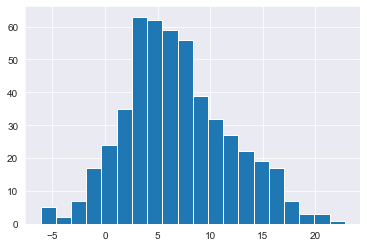

In [3]:
from matplotlib import pyplot as plt

# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

### Using ttest

In [6]:
import pingouin
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],y=0,alternative='two-sided')

# Print the test results
print(test_results)
print("\n Testing differences between two means using ttest()")

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  1.354985   

              BF10  power  
T-test  2.246e+111    1.0  

 Testing differences between two means using ttest()


In [7]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],paired=True,
alternative="two-sided")

# Print the paired test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


### Anova (Analysis of Variance) test

EDA of late shipment mode

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64
shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


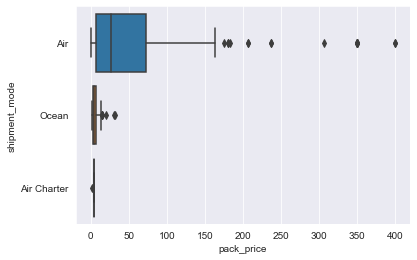

In [11]:
import seaborn as sns
late_shipments=pd.read_feather('dataset/late_shipments.feather')
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].mean()
print(xbar_pack_by_mode)

# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()
print(s_pack_by_mode)

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price',y='shipment_mode',data=late_shipments)
plt.show()

### Conducting an ANOVA test
he box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

Ho: Pack prices for every category of shipment mode are the same.

Ha: Pack prices for some categories of shipment mode are different.
Use a significance level of 0.1.

In [13]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,dv='pack_price', between='shipment_mode')
# Print anova_results
print(anova_results)
print("\n Since p-value is less or equal to significance level, so null hypothesis should be rejected. There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.")

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018

 Since p-value is less or equal to significance level, so null hypothesis should be rejected. There is a significant difference in pack prices between the shipment modes. However, we don't know which shipment modes this applies to.


### Pairwise t-tests
The ANOVA test didn't tell you which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use pairwise t-tests

In [14]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,dv='pack_price', between='shipment_mode',padjust='none')

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [15]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments,
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  
